In [3]:
import pandas as pd
from code.data_module import CrowdTangleDataModule
from code.model import BaseModel
import pytorch_lightning as pl
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


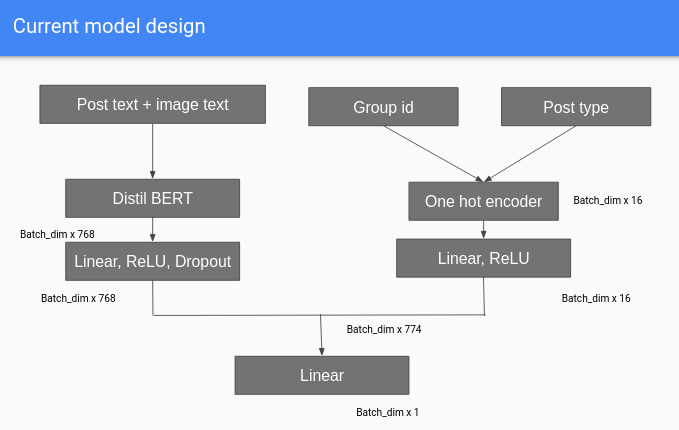

In [4]:
# Start tensorboard
! pkill tensorboard
! rm -r /tmp/.tensorboard-info
%tensorboard --logdir lightning_logs --bind_all

In [3]:
config = {
    'batch_size': 128,
    'dataset_path': '../data/crowdtangle_rtnews_v1_filtered.csv',
    'category_group_id': False,
    'learning_rate': 1e-4
}

# Read dataset + labels

In [4]:
data_module = CrowdTangleDataModule(config=config)
data_module.setup('')
# tokenizer for decoding sentences
tokenizer = data_module.get_tokenizer() 

In [5]:
category_vector_length = len(data_module.class_encoder.get_feature_names())
config['category_encoded_length'] = category_vector_length
config['category_encoder_out'] = category_vector_length
model = BaseModel(config)
trainer = pl.Trainer(gpus=1,
                     log_every_n_steps=1,
                     flush_logs_every_n_steps=1,
                    callbacks=[EarlyStopping(monitor='val_loss')]) #, max_epochs=10, overfit_batches=10)
trainer.fit(model, data_module)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name             | Type             | Params
------------------------------------------------------
0 | train_metric     | MeanSquaredError | 0     
1 | val_metric       | MeanSquaredError | 0     
2 | test_metric      | MeanSquaredError | 0     
3 | bert             | DistilBertModel  | 66.4 M
4 | distilbert_tail  | Sequential       | 590 K 
5 | category_encoder | Sequential       | 272   
6 | classifier       | Linear           | 785   
------------------------------------------------------
591 K     Trainable params
66.4 M    Non-trainable params
67.0 M    Total params


Validation sanity check: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

Validating: |          | 0/? [00:00<?, ?it/s]

1

In [ ]:
import tldextract
extract = tldextract.TLDExtract()
r = extract('https://www.facebook.com/photo.php?fbid=206560174220361&set=p.206560174220361&type=3')
r

In [ ]:
r.domain

In [ ]:
y_lst, encoded_texts_lst, category_vectors_lst = next(iter(data_module.train_dataloader()))


In [ ]:
len(data_module.class_encoder.categories_[2])